# LAB 2: Linear Equations and Matrix Algebra

In this lab you will use python to study the following topics:

- Solving a system of linear equations by using the reduced row echelon form of the augmented matrix of the system.

- Forming linear combinations of a set of vectors and the fundamental concepts of linear independence.

- Matrix multiplication and its properties.

# First: you should run this cell

In [ ]:
# Make all numpy available via shorter 'np' prefix
import numpy as np
# Make all sympy available via shorter 'sym' prefix
import sympy as sym


# matplotlib library
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator


def rvect(m):
    return np.fix((10 * (np.random.rand(m, 1))))


def rmat(m, n):
    return np.fix((10 * (np.random.rand(m, n))))


def rref(A):
    return np.array(sym.Matrix(A).rref(iszerofunc=lambda x:sym.comp(x,0,1e-13))[0], np.float64)


def nulbasis(A):
    A = sym.Matrix(A)
    tmp =  A.nullspace()
    n = len(tmp)
    m = len(tmp[0])
    N = np.zeros((m,n))
    for i in range(m):
        for j in range(n):
                N[i,j] = tmp[j][i]
    return N

# Question 1. Solving Ax = b

In this question you will find the general solution $x \in R^3$ to a linear system $Ax = b$ of 3 equations in 5
variables $x_1, x_2, x_3, x_4, x_5$. Here $A$ is the $3 \times 5$ coeffient matrix system $b \in R^3$ is the given right-hand side of the system

<h4>
    (a) Use rmat function that was defined in the first cell to generate a random $3 \times5$ integer matrix $A$ and to check that columns 1, 2, 3 of $A$ are the pivot columns.
</h4>

- `A = rmat(3, 5)`
- `np.linalg.matrix_rank(A[:, 0:3])`


In [ ]:
A = rmat(3, 5)
np.linalg.matrix_rank(A[:, 0:3])
print("------------A------------------")
print(A)
print("-------------------------------")
print("-----------rank(A)-------------")
print(np.linalg.matrix_rank(A[:, 0:3]))
print("-------------------------------")

------------A------------------
[[6. 4. 4. 2. 9.]
 [2. 5. 7. 7. 9.]
 [6. 8. 9. 0. 1.]]
-------------------------------
-----------rank(A)-------------
3
-------------------------------


In [ ]:
#type your code here:


----------A-----------
[[9. 9. 2. 1. 7.]
 [7. 9. 6. 9. 3.]
 [1. 9. 0. 0. 4.]]
---------------------
----------rank(A)-----
3
---------------------


Note the use of the colon operator to select columns 1, 2, 3 of $A$. If the rank is less than 3, generate a new A
(this is unlikely, but it can happen). Include all the matrices that you generate this way in your lab report.
<h4>
When you have an $A$ for which the rank of the first three columns is 3:
</h4>

- Generate a random vector $b \in R^3$

- The reduced row echelon form R of the augmented matrix $\begin{bmatrix} A & b   \end{bmatrix}$:


In [ ]:
b = rvect(3)
aug = np.hstack((A, b))
R = rref(aug)
print("-------b--------")
print(b)
print("----------------")
print("-------augmented_matrix---------")
print(aug)
print("----------------")
print("--------R-------")
print(R)
print("----------------")

-------b--------
[[7.]
 [0.]
 [8.]]
----------------
-------augmented_matrix---------
[[6. 4. 4. 2. 9. 7.]
 [2. 5. 7. 7. 9. 0.]
 [6. 8. 9. 0. 1. 8.]]
----------------
--------R-------
[[  1.           0.           0.           1.92307692   4.88461538
    0.5       ]
 [  0.           1.           0.          -9.92307692 -17.38461538
    4.        ]
 [  0.           0.           1.           7.53846154  12.30769231
   -3.        ]]
----------------


In [ ]:
#type your code here:


-------b--------
[[5.]
 [8.]
 [2.]]
----------------
-------augmented_matrix---------
[[9. 9. 2. 1. 7. 5.]
 [7. 9. 6. 9. 3. 8.]
 [1. 9. 0. 0. 4. 2.]]
----------------
-------R------------------------------------------
[[ 1.          0.          0.         -0.33333333  0.55555556  0.16666667]
 [ 0.          1.          0.          0.03703704  0.38271605  0.2037037 ]
 [ 0.          0.          1.          1.83333333 -0.72222222  0.83333333]]
--------------------------------------------------


<h4>
     To get the reduced row echelon form S = rref(A) just remove the last column from R:
</h4>

- `S = R[:, :-1] or R[:, 0:5]`


In [ ]:
print("---------------S-----------------")
S = rref(R[:, :-1])
print(S)

---------------S-----------------
[[  1.           0.           0.           1.92307692   4.88461538]
 [  0.           1.           0.          -9.92307692 -17.38461538]
 [  0.           0.           1.           7.53846154  12.30769231]]


In [ ]:
#type your code here:



--------S------------
[[ 1.          0.          0.         -0.33333333  0.55555556]
 [ 0.          1.          0.          0.03703704  0.38271605]
 [ 0.          0.          1.          1.83333333 -0.72222222]]
---------------------


(Note the use of the colon operator to select columns 1 to 5 of R).
<h4>Check by python that S = rref(A)</h4>

In [ ]:
print("---------------rref(A)-----------------")
S = rref(A)
print(S)

---------------rref(A)-----------------
[[  1.           0.           0.           1.92307692   4.88461538]
 [  0.           1.           0.          -9.92307692 -17.38461538]
 [  0.           0.           1.           7.53846154  12.30769231]]


In [ ]:
#type your code here:


--------rref(A)------------
[[ 1.          0.          0.         -0.33333333  0.55555556]
 [ 0.          1.          0.          0.03703704  0.38271605]
 [ 0.          0.          1.          1.83333333 -0.72222222]]
---------------------


1. Which columns of $S$ are the pivot columns?
        [1, 0, 0] , [0,1,0], [0,0,1]
2. What is the rank of $R$ and the rank of $A$?  
        3
3. What is the nullity of $A$ and which variables $x_i$ are be the free variables?
4. Why does the equation $Ax = b$ have a solution?
        because A is invertable!



#### Print the rank of A, R, and S matrices

In [ ]:
print(np.linalg.matrix_rank(A))
print("-" * 60)
print(np.linalg.matrix_rank(R))
print("-" * 60)
print(np.linalg.matrix_rank(S))
print("-" * 60)

3
------------------------------------------------------------
3
------------------------------------------------------------
3
------------------------------------------------------------


In [ ]:
#type your code here:


3
---------------------
3
---------------------
3
---------------------


#### (b) Use python to obtain (the last column of $R$), `c = R[:, [-1]]`. set `x = np.block([[c], [0], [0]])`. $x \in R^5$ and the last two components of $x$ are zeros. then:


- Calculate by python that $Ax - b = 0$ and $Sx - c = 0$.




In [ ]:
c = R[:, [-1]]
x = np.block([[c], [0], [0]])
print("-" * 20 , "c", "-" * 20)
print(c)
print("-" * 45)
print("-" * 20 , "x", "-" * 20)
print(x)
print("-" * 45)
print("-" * 20 , "A @ x - b", "-" * 20)
print((A @ x) - b)
print("-" * 45)
print("-" * 20 , "S @ x - c", "-" * 20)
print(S @ x - c)
print("-" * 45)


-------------------- c --------------------
[[ 0.5]
 [ 4. ]
 [-3. ]]
---------------------------------------------
-------------------- x --------------------
[[ 0.5]
 [ 4. ]
 [-3. ]
 [ 0. ]
 [ 0. ]]
---------------------------------------------
-------------------- A @ x - b --------------------
[[0.]
 [0.]
 [0.]]
---------------------------------------------
-------------------- S @ x - c --------------------
[[0.]
 [0.]
 [0.]]
---------------------------------------------


In [ ]:
#type your code here:


-----------c--------------
[[0.16666667]
 [0.2037037 ]
 [0.83333333]]
-------------------------
-----------x--------------
[[0.16666667]
 [0.2037037 ]
 [0.83333333]
 [0.        ]
 [0.        ]]
-------------------------
--------A @ x - b--------------
[[0.]
 [0.]
 [0.]]
-------------------------
--------A @ x - c--------------
[[0.]
 [0.]
 [0.]]
-------------------------


#### (c) Use python to calculate

- `u = np.block([[-S[:, [3]]], [1], [0]])`
- `v = np.block([[-S[:, [4]]], [0], [1]])`


1. Give a handwritten explanation, using symbols and linear algebra, rather than numbers, to show why u and v are the vectors that appear in the vector form of the general solution to Ax = 0.
    - Confirm by calculating `S @ u`, `A @ u`, `S @ v`, `A @ v`. You should get vectors that are (approximately) zero.
    - Now generate a random linear combination of u and v by the commands `s = np.random.rand(1)`, `t = np.random.rand(1)`, and `y = s * u + t * v` (Note that each occurrence of np.random.rand(1) generates a different random coefficient).

2. What properties of matrix and vector algebra ensure that Ay = 0?
    - Confirm by a python calculation that `A @ y` is approximately zero.







In [ ]:
u = np.block([[-S[:, [3]]], [1], [0]])
v = np.block([[-S[:, [4]]], [0], [1]])

s = np.random.rand(1)
t = np.random.rand(1)
y = s * u + t * v

print("-" * 20 , "u", "-" * 20)
print(u)
print("-" * 45)
print("-" * 20 , "v", "-" * 20)
print(v)
print("-" * 45)
print("-" * 20 , "A @ x", "-" * 20)
print((A @ x))
print("-" * 45)
print("-" * 20 , "A @ u", "-" * 20)
print(A @ u)
print("-" * 45)
print("-" * 20 , "S @ v", "-" * 20)
print(S @ v)
print("-" * 45)
print("-" * 20 , "A @ v", "-" * 20)
print(A @ v)
print("-" * 45)
print("-" * 20 , "A @ y", "-" * 20)
print(A @ y)
print("-" * 45)


-------------------- u --------------------
[[-1.92307692]
 [ 9.92307692]
 [-7.53846154]
 [ 1.        ]
 [ 0.        ]]
---------------------------------------------
-------------------- v --------------------
[[ -4.88461538]
 [ 17.38461538]
 [-12.30769231]
 [  0.        ]
 [  1.        ]]
---------------------------------------------
-------------------- A @ x --------------------
[[7.]
 [0.]
 [8.]]
---------------------------------------------
-------------------- A @ u --------------------
[[0.00000000e+00]
 [0.00000000e+00]
 [1.42108547e-14]]
---------------------------------------------
-------------------- S @ v --------------------
[[0.]
 [0.]
 [0.]]
---------------------------------------------
-------------------- A @ v --------------------
[[-1.42108547e-14]
 [-1.42108547e-14]
 [-2.84217094e-14]]
---------------------------------------------
-------------------- A @ y --------------------
[[-7.77156117e-16]
 [-7.77156117e-16]
 [-1.66533454e-15]]
------------------------------

In [ ]:
#type your code here:


-----------u-----------
[[ 0.33333333]
 [-0.03703704]
 [-1.83333333]
 [ 1.        ]
 [ 0.        ]]
----------------------
-----------v-----------
[[-0.55555556]
 [-0.38271605]
 [ 0.72222222]
 [ 0.        ]
 [ 1.        ]]
----------------------
-----------S @ u-----------
[[0.]
 [0.]
 [0.]]
----------------------
----------A @ u------------
[[ 0.00000000e+00]
 [-2.22044605e-16]
 [ 0.00000000e+00]]
----------------------
----------S @ v------------
[[0.]
 [0.]
 [0.]]
----------------------
----------A @ v------------
[[ 2.22044605e-16]
 [-8.88178420e-16]
 [ 4.44089210e-16]]
----------------------
---------A @ y-------------
[[1.11022302e-16]
 [5.55111512e-16]
 [2.22044605e-16]]
----------------------


#### (d) Use python to calculate `z = x + y` .
- What properties of matrix and vector algebra imply that $Az = b$?
- Confirm by a python calculation that `A @ z - b` is approximately zero.

In [ ]:
z = x  + y
print("-" * 20 , "A @ z - b", "-" * 20)
print((A @ z - b).round())
print("-" * 45)

-------------------- A @ z - b --------------------
[[ 0.]
 [-0.]
 [ 0.]]
---------------------------------------------


In [ ]:
#type your code here:



-----------A @ z - b--------------
[[0.]
 [0.]
 [0.]]
----------------------------------


# Question 2. Spanning Sets and Linear Independence

#### Generate four random vectors in R3 by the command
- `u1 = rvect(3)`
- `u2 = rvect(3)`
- `u3 = rvect(3)`
- `u4 = rvect(3)`




#### (a) Consider the set of vectors S = {u1, u2, u3}. To determine whether S is linearly independent, form the matrix A with the vectors from S as columns and calculate its reduced row echelon form
- `A = np.block([u1, u2, u3])`
- `rref(A)`

#### Use these calculations to answer the following questions:

1. How many free variables does the equation Ax = 0 have?

2. Is the set S linearly independent or linearly dependent? Why?
        Linearly independent because its rref is identity matrix

In [ ]:
u1 = rvect(3)
u2 = rvect(3)
u3 = rvect(3)
u4 = rvect(3)

A = np.block([u1, u2, u3])
rref(A)

print("-" * 20 , "A", "-" * 20)
print(A)
print("-" * 45)
print("-" * 20 , "rref(A)", "-" * 20)
print(rref(A))
print("-" * 45)

-------------------- A --------------------
[[6. 5. 1.]
 [4. 9. 4.]
 [8. 4. 2.]]
---------------------------------------------
-------------------- rref(A) --------------------
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
---------------------------------------------


In [ ]:
####type your code here:



------A---------
[[0. 3. 3.]
 [2. 7. 2.]
 [8. 0. 0.]]
----------------
------rref(A)---------
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
----------------


#### (b) Consider the set of vectors T = {u1, u2, u3, u4}. To determine whether T is linearly independent, form the matrix B with the vectors from T as columns and calculate its reduced row echelon form:

- `B = [u1 u2 u3 u4]`
- `rref(B)`

#### Use these calculations to answer the following questions:

1. How many free variables does the equation $Bx = 0$ have?

2. Is the set T linearly independent or linearly dependent?

In [ ]:
B = np.hstack([u1, u2, u3, u4])
rref(B)
print("-" * 20 , "B", "-" * 20)
print(B)
print("-" * 45)
print("-" * 20 , "rref(B)", "-" * 20)
print(rref(B))
print("-" * 45)

-------------------- B --------------------
[[6. 5. 1. 1.]
 [4. 9. 4. 0.]
 [8. 4. 2. 3.]]
---------------------------------------------
-------------------- rref(B) --------------------
[[ 1.          0.          0.          0.46052632]
 [ 0.          1.          0.         -0.47368421]
 [ 0.          0.          1.          0.60526316]]
---------------------------------------------


In [ ]:
#type your code here:


------B---------
[[0. 3. 3. 1.]
 [2. 7. 2. 4.]
 [8. 0. 0. 2.]]
----------------
------rref(B)---------
[[ 1.          0.          0.          0.25      ]
 [ 0.          1.          0.          0.56666667]
 [ 0.          0.          1.         -0.23333333]]
----------------


#### (c) Let v be a random linear combination of u1 and u2:

- `v = np.random.rand(1) * u1 + np.random.rand(1) * u2`

#### Thus v is of the form c1u1 + c2u2 for some scalars c1, c2. Consider the set of vectors U = {u1, u2, v}.

1. Is the set U linearly independent or linearly dependent?
2. Answer first without calculation using the definition of linear independent sets.



#### Check your answer by python using the method of part (a).

In [ ]:
v = np.random.rand(1) * u1 + np.random.rand(1) * u2
U = np.hstack([u1, u2, v])
print("-" * 20 , "U", "-" * 20)
print(U)
print("-" * 45)
print("-" * 20 , "rref(U)", "-" * 20)
print(rref(U))
print("-" * 45)

-------------------- U --------------------
[[6.         5.         5.53529027]
 [4.         9.         8.69207885]
 [8.         4.         5.02655864]]
---------------------------------------------
-------------------- rref(U) --------------------
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
---------------------------------------------


In [ ]:
#type your code here:


------U---------
[[0.         3.         0.84174763]
 [2.         7.         2.81036291]
 [8.         0.         3.3851404 ]]
----------------
------rref(U)---------
[[1.         0.         0.42314255]
 [0.         1.         0.28058254]
 [0.         0.         0.        ]]
----------------


# Question 3 :Visualizing the Column Space

In this question you will determine visually whether given vectors lie in the column space of a matrix.
Random Seed: Initialize the random number generator by typing
rand(’seed’, abcd)
where abcd are the last four digits of your student ID number. This will ensure that you generate your own
particular random vectors and matrices.

#### Now generate a random $3 \times 2$ integer matrix $A$ by the python and calculate rank(A). Since $A$ is a random matrix, the rank is very likely to be 2. If the rank is not 2, generate another A. Repeat the test until you get a matrix with rank 2.

- `A = rmat(3, 2)`
- `np.linalg.matrix_rank(A)`


In [ ]:
import random

random.seed(1234)

A = rmat(3, 2)

print("-" * 20 , "A", "-" * 20)
print(A)
print("-" * 45)
print("-" * 20 , "rank(A)", "-" * 20)
print(np.linalg.matrix_rank(A))
print("-" * 45)

-------------------- A --------------------
[[5. 6.]
 [8. 1.]
 [3. 5.]]
---------------------------------------------
-------------------- rank(A) --------------------
2
---------------------------------------------


In [ ]:
#type your code here:


------------A-------------
[[7. 8.]
 [5. 6.]
 [3. 8.]]
--------------------------
------------rank(A)-------------
2
--------------------------


#### Use this matrix in the rest of the question. If you need to generate more than one matrix, include all the matrices you generate in your lab report.

#### (a) Define `u = A[:,[0]]`, `v = A[:,[1]]` to be the column vectors for A. To graph the column space Col(A) of A, enter the python commands:
- `s, t = np.meshgrid(np.arange(-1, 1, 0.1), np.arange(-1, 1, 0.1))`
- `X = s * u[0] + t * v[0]`
- `Y = s * u[1] + t * v[1]`
- `Z = s * u[2] + t * v[2]`
- Use matplotlib to graph the cloumn space using `plot_surface` as in this [example](https://matplotlib.org/gallery/mplot3d/surface3d.html#sphx-glr-gallery-mplot3d-surface3d-py)
- Set graph axis limit -10, 10.
- Set the color map of the graph to `cm.hot`.

-------------------- u --------------------
[[5.]
 [8.]
 [3.]]
---------------------------------------------
-------------------- v --------------------
[[6.]
 [1.]
 [5.]]
---------------------------------------------


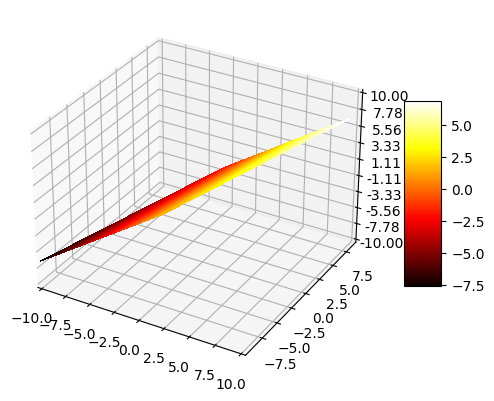

In [ ]:
u = A[:,[0]]
v = A[:,[1]]
s, t = np.meshgrid(np.arange(-1, 1, 0.1), np.arange(-1, 1, 0.1))
X = s * u[0] + t * v[0]
Y = s * u[1] + t * v[1]
Z = s * u[2] + t * v[2]


fig, ax = plt.subplots(subplot_kw={"projection": "3d"})


# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.hot,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_xlim(-10, 10)
ax.set_zlim(-10, 10)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

print("-" * 20 , "u", "-" * 20)
print(u)
print("-" * 45)

print("-" * 20 , "v", "-" * 20)
print(v)
print("-" * 45)

plt.show()

------------u-------------
[[7.]
 [5.]
 [3.]]
--------------------------
------------v-------------
[[8.]
 [6.]
 [8.]]
--------------------------


C:\Users\OMARME~1\AppData\Local\Temp/ipykernel_23816/3205482725.py:15: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


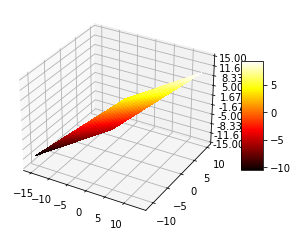

In [ ]:
#type your code here


#### (b) Generate a random vector in R3 using the `rvect` function
- b = rvect(3)

In [ ]:
b = rvect(3)
print("-" * 20 , "b", "-" * 20)
print(b)
print("-" * 45)

-------------------- b --------------------
[[0.]
 [2.]
 [4.]]
---------------------------------------------


In [ ]:
#type your code here:


------------b-------------
[[2.]
 [2.]
 [9.]]
--------------------------


#### To graph the line Span(b) in the same figure as Col(A):
- Copy the previous code that was used to graph Col(A)
- Generate array r. `r = np.arange(-1, 1, 0.05)`
- Plot the span(b). `ax.plot(r * b[0], r * b[1], r * b[2], 'b+', markersize=20)`
- Note that the previous step should be before plt.show() to plot on the same figure.
- Use `ax.view_init(45, 45)` change the values 45, 45 to rotate the figure to different view.

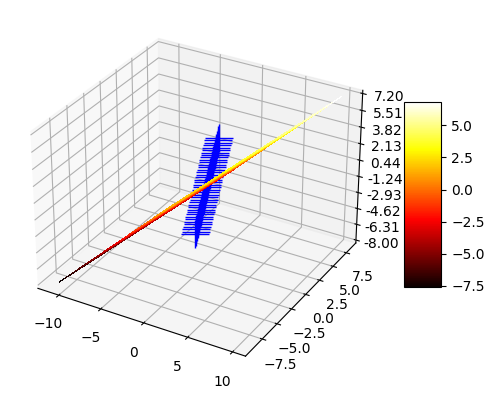

In [ ]:
u = A[:,[0]]
v = A[:,[1]]
s, t = np.meshgrid(np.arange(-1, 1, 0.1), np.arange(-1, 1, 0.1))
X = s * u[0] + t * v[0]
Y = s * u[1] + t * v[1]
Z = s * u[2] + t * v[2]

r = np.arange(-1, 1, 0.05)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})


# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.hot,
                       linewidth=0, antialiased=False)

# Customize the z axis.
# ax.set_xlim(-10, 10)
# ax.set_zlim(-10, 10)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

ax.plot(r * b[0], r * b[1], r * b[2], 'b+', markersize=20)
# ax.view_init(0, 45)

plt.show()

C:\Users\OMARME~1\AppData\Local\Temp/ipykernel_23816/2380683397.py:3: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


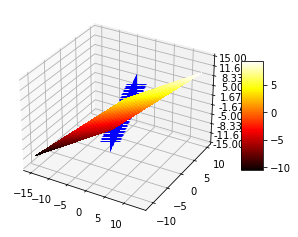

In [ ]:
#type your code here:


#### (c) Can you find a vector $x \in R^2$ such that $Ax = b$, where $A$ is the matrix and $b$ is the vector that you have generated? Explain why or why not using the graph from part (b).


### -------------------------------------Type your answer here------------------------------------------------------------ ###

No we can't as matrix A transform the vecorts to its span(space) and vector b isn't a linear combination of the columns of matrix A so we can't preduce it as with leaner combination.

### ---------------------------------------------------------------------------------------------------------------------------------- ###

#### (d) Generate a random vector lying in Col(A) where:

- `z = np.random.rand(2, 1)`
- `c = A @ z`

In [ ]:
z = np.random.rand(2, 1)
c = A @ z
print("-" * 20 , "c", "-" * 20)
print(c)
print("-" * 45)

-------------------- c --------------------
[[5.89992304]
 [5.20404218]
 [4.22950831]]
---------------------------------------------


In [ ]:
#type your code here:


---------c-------------
[[7.06252724]
 [5.23346768]
 [6.04768326]]
-----------------------


#### Plot a new graph of Span(c) and Col(A)

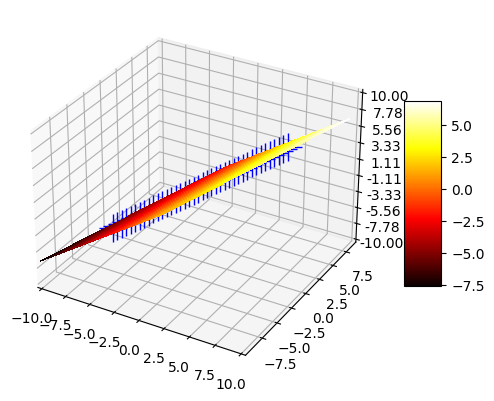

In [ ]:
#type your code here
u = A[:,[0]]
v = A[:,[1]]
s, t = np.meshgrid(np.arange(-1, 1, 0.1), np.arange(-1, 1, 0.1))
X = s * u[0] + t * v[0]
Y = s * u[1] + t * v[1]
Z = s * u[2] + t * v[2]
r = np.arange(-1, 1, 0.05)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})


# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.hot,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_xlim(-10, 10)
ax.set_zlim(-10, 10)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

ax.plot(r * c[0], r * c[1], r * c[2], 'b+', markersize=20)

plt.show()

# Question 4: Reduced Row Echelon Form and Null Space

#### First generate a random $3 \times 3$ integer matrix $B$ and check its rank:
- `B = rmat(3, 3)`
- `np.linalg.matrix_rank(B)`

In [ ]:
B = rmat(3, 3)

print("-" * 20 , "B", "-" * 20)
print(B)
print("-" * 45)
print("-" * 20 , "rank(B)", "-" * 20)
print(np.linalg.matrix_rank(B))
print("-" * 45)

-------------------- B --------------------
[[8. 7. 2.]
 [0. 6. 0.]
 [1. 2. 2.]]
---------------------------------------------
-------------------- rank(B) --------------------
3
---------------------------------------------


In [ ]:
#type your code here:


-----------B---------------
[[1. 8. 7.]
 [8. 8. 8.]
 [8. 0. 1.]]
--------------------------
----------rank(B)------------
3
--------------------------


#### Since $B$ is random, it is very likely to have rank $3$. If not, generate another $B$ until this is true. Now use $B$ to define a $3 \times 5$ matrix $A$ and its reduced row echelon form $R$ by

- `A = np.block([B[:, [0]], B[:, [1]], 2 * B[:, [0]] + 3 * B[:, [1]], 4 * B[:, [0]] - 5 * B[:, [1]], B[:, [2]]])`
- `R = rref(A)`

#### (a) Use the definition of $A$ in terms of $B$ and the Column Correspondence Property to answer the following.

- Explain why columns #1, #2, and #5 are the pivot columns of A and R.

In [ ]:
A = np.block([B[:, [0]], B[:, [1]], 2 * B[:, [0]] + 3 * B[:, [1]], 4 * B[:, [0]] - 5 * B[:, [1]], B[:, [2]]])
R = rref(A)
print("-" * 20 , "A", "-" * 20)
print(A)
print("-" * 45)
print("-" * 20 , "B", "-" * 20)
print(B)
print("-" * 45)

-------------------- A --------------------
[[  8.   7.  37.  -3.   2.]
 [  0.   6.  18. -30.   0.]
 [  1.   2.   8.  -6.   2.]]
---------------------------------------------
-------------------- B --------------------
[[8. 7. 2.]
 [0. 6. 0.]
 [1. 2. 2.]]
---------------------------------------------


In [ ]:
#type your code here:


-----------A---------------
[[  1.   8.  26. -36.   7.]
 [  8.   8.  40.  -8.   8.]
 [  8.   0.  16.  32.   1.]]
--------------------------
----------R------------
[[ 1.  0.  2.  4.  0.]
 [ 0.  1.  3. -5.  0.]
 [ 0.  0.  0.  0.  1.]]
--------------------------


#### (b) Let $V$ be the set of solutions to the homogeneous system of equations $Ax = 0$ (the null space of $A$). In the equation $Ax = 0$ (where $x \in R^5$),

- what are the free variables and what is dim V ?

#### (c) Use the python function that was defined in the first cell `nulbasis` to calculate the special solutions to the system of equations $Ax = 0$:

- `N = nulbasis(A)`

#### The columns of $N$ are the solutions to $Ax = 0$ obtained by setting one free variable to 1 and all the other free variables to 0. Define:
- `v1 = N[:,[0]]`
- `v2 = N[:,[1]]`

(Notice that `v1` and `v2` are 5-component vectors, not scalars.)

1. Which component of v1 is 1 and which components of v1 are zero?

2. Which component of v2 is 1 and which components of v2 are zero?

3. Check by python that v1 and v2 are in null space of A.

In [ ]:
N = nulbasis(A)
v1 = N[:,[0]]
v2 = N[:,[1]]
print("-" * 20 , "N", "-" * 20)
print(N)
print("-" * 45)
print("-" * 20 , "v1", "-" * 20)
print(v1)
print("-" * 45)
print("-" * 20 , "v2", "-" * 20)
print(v2)
print("-" * 45)
print("-" * 20 , "A @ v1", "-" * 20)
print(A @ v1)
print("-" * 45)
print("-" * 20 , "A @ v2", "-" * 20)
print(A @ v2)
print("-" * 45)

-------------------- N --------------------
[[-2. -4.]
 [-3.  5.]
 [ 1.  0.]
 [ 0.  1.]
 [ 0.  0.]]
---------------------------------------------
-------------------- v1 --------------------
[[-2.]
 [-3.]
 [ 1.]
 [ 0.]
 [ 0.]]
---------------------------------------------
-------------------- v2 --------------------
[[-4.]
 [ 5.]
 [ 0.]
 [ 1.]
 [ 0.]]
---------------------------------------------
-------------------- A @ v1 --------------------
[[0.]
 [0.]
 [0.]]
---------------------------------------------
-------------------- A @ v2 --------------------
[[0.]
 [0.]
 [0.]]
---------------------------------------------


In [ ]:
#type your code here:


-------------N--------------
[[-2. -4.]
 [-3.  5.]
 [ 1.  0.]
 [ 0.  1.]
 [ 0.  0.]]
----------------------------
-------------v1--------------
[[-2.]
 [-3.]
 [ 1.]
 [ 0.]
 [ 0.]]
----------------------------
-------------v2--------------
[[-4.]
 [ 5.]
 [ 0.]
 [ 1.]
 [ 0.]]
----------------------------
-------------A @ v1--------------
[[0.]
 [0.]
 [0.]]
----------------------------
-------------A @ v2--------------
[[0.]
 [0.]
 [0.]]
----------------------------


#### (d) Now generate a random linear combination `x` of the vectors `v1` and `v2`:
- `s = np.random.rand(1)`
- `t = np.random.rand(1)`
- `x = s * v1 + t * v2`

(Note that each occurrence of rand(1) generates a different random coefficient).

- Confirm by python that $x$ satisfies $Ax = 0$ and $Rx = 0$.

In [ ]:
s = np.random.rand(1)
t = np.random.rand(1)
x = s * v1 + t * v2
print("-" * 20 , "A @ x", "-" * 20)
print(A @ x)
print("-" * 45)
print("-" * 20 , "R @ x", "-" * 20)
print(R @ x)
print("-" * 45)

-------------------- A @ x --------------------
[[0.]
 [0.]
 [0.]]
---------------------------------------------
-------------------- R @ x --------------------
[[4.4408921e-16]
 [0.0000000e+00]
 [0.0000000e+00]]
---------------------------------------------


In [ ]:
#type your code here:


-------------A @ x--------------
[[ 1.77635684e-15]
 [-7.10542736e-15]
 [ 0.00000000e+00]]
--------------------------------
-------------R @ x--------------
[[0.]
 [0.]
 [0.]]
--------------------------------
